<a href="https://colab.research.google.com/github/phycem/Data-Science-Projects-and-Tasks/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction:
## by Cemile Senem Arabaci

### This analysis is to predict if a patient has heart disease or not by using the given variables for the patient.  

## Importing the libraries we need 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
sns.set()

from scipy.stats import skew
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score 


import plotly.graph_objects as go
import tensorflow as tf

import plotly.express as px

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/phycem/Data-Science-Projects-and-Tasks/main/Awake%20Labs%20Take%20Home%20Challenge/Dataset%20for%20DS%20Challenge.csv')

## Understanding variables given in the dataset

### Approach

### Data Summary

In [1]:
from tabulate import tabulate
 
# assign data
mydata = [["Age","Age of the patient"],
    ["Sex" , "1 is male , 0 is female"],
    ["Output", "1 is heart attack, 0 is normal"],
    ["cp", "Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 =Non-anginal Pain, 3 =Asymptomatic "],
      ["trtbps", "Resting blood pressure"],["chol","Cholestoral in mg/dl fetched via BMI sensor"],["restecg","Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy"],["fbs","(fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False"],["thalachh","Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy"],["oldpeak","previous peak"],["slp", "slope ranges from 1-6 (found below)"],["caa", "number of major vessels"],["thall", "Thalium Stress Test result ~ (0,3)"],["exng", "Exercise induced angina ~ 1 = Yes, 0 = No"],[ "o2Saturation" ,"Blood oxygen saturation (%)"]
]
 
# create header
head = ["Attribute", "Description"]
 
# display table
print(tabulate(mydata, headers=head))

Attribute     Description
------------  ------------------------------------------------------------------------------------------------------------
Age           Age of the patient
Sex           1 is male , 0 is female
Output        1 is heart attack, 0 is normal
cp            Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 =Non-anginal Pain, 3 =Asymptomatic
trtbps        Resting blood pressure
chol          Cholestoral in mg/dl fetched via BMI sensor
restecg       Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
fbs           (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
thalachh      Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
oldpeak       previous peak
slp           slope ranges from 1-6 (found below)
caa           number of major vessels
thall         Thalium Stress Test result ~ (0,3)
exng          Exercise induced angina ~ 1 = Yes, 

### There is none of the feature values on rows after row 303 present

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


### Preview the info of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    float64
 1   sex           303 non-null    float64
 2   cp            303 non-null    float64
 3   trtbps        303 non-null    float64
 4   chol          303 non-null    float64
 5   fbs           303 non-null    float64
 6   restecg       303 non-null    float64
 7   thalachh      303 non-null    float64
 8   exng          303 non-null    float64
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    float64
 11  caa           303 non-null    float64
 12  thall         303 non-null    float64
 13  output        303 non-null    float64
 14  o2Saturation  3586 non-null   float64
dtypes: float64(15)
memory usage: 420.4 KB


In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.484488
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.352649
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


In [12]:
3586-303

3283

#### There are 3283 null instances. We observe that only 303 rows have only output variables and no feature variable. Since the feature variables are completely absent, we will drop these cases for further analysis.

### Drop the empty rows on the table.

In [5]:
df = df.dropna(axis=0)

In [6]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0,97.5
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0,97.5
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0,97.5
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0,97.5


#### The dataset comprises 303 examples (patients).

### Checking if there is still any missing value.

In [7]:
df.isnull().sum()

age             0
sex             0
cp              0
trtbps          0
chol            0
fbs             0
restecg         0
thalachh        0
exng            0
oldpeak         0
slp             0
caa             0
thall           0
output          0
o2Saturation    0
dtype: int64

### Data Exploration 

#### Understanding output variable

In [14]:
#@title #Heart Disease Output Value Distribution in a Pie Chart
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Heart Disease Distribution of Values']
values = df['output'].value_counts()/df['output'].shape[0]

fig0 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig0.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig0.update_layout(
    title_text="Heart Disease",
    title_font_color="black",
    legend_title_font_color="yellow",
    #paper_bgcolor="black",
    #plot_bgcolor='black',
    font_color="black",
)
fig0.show()

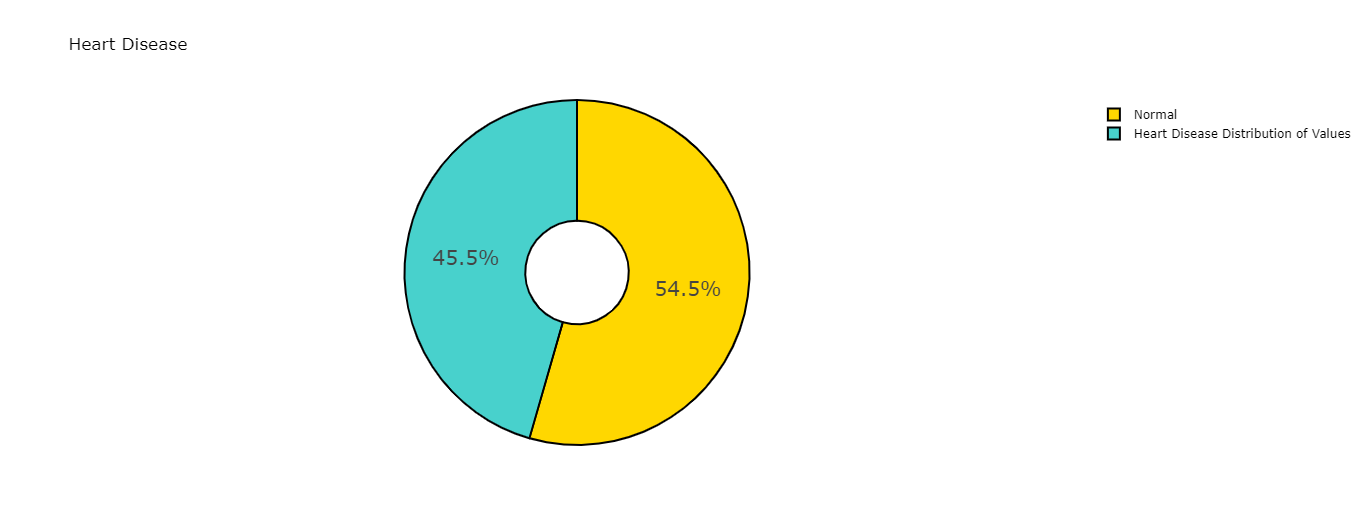